In [217]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter1d

In [218]:
def normalize_histogram(data):
    """
    Reads a .hist file, applies min-max normalization to the 'number of distinct k-mers' values,
    and writes the normalized data to a new file.

    Parameters:
        input_path (str): Path to the input .hist file.
        output_dir (str): Directory where the output file will be saved.
        output_file (str): Name of the output file.
    """
    
    # Min-max normalization: (value - min) / (max - min)
    min_val = data['distinct_kmers'].min()
    print(min_val)
    max_val = data['distinct_kmers'].max()
    print(max_val)
    data['distinct_kmers_normalized'] = (data['distinct_kmers'] - min_val) / (max_val - min_val)
    
    return data

In [219]:
# perform log normalization
def log_normalize_histogram(data):
    """
    Reads a .hist file, applies log normalization to the 'number of distinct k-mers' values,
    and writes the normalized data to a new file.

    Parameters:
        input_path (str): Path to the input .hist file.
        output_dir (str): Directory where the output file will be saved.
        output_file (str): Name of the output file.
    """
    
    # Log normalization: log(value + 1)
    data['distinct_kmers_normalized'] = data['distinct_kmers'].apply(lambda x: np.log(x + 1))
    
    return data

In [220]:
def zscore_normalize_histogram(data):
    """
    Reads a .hist file, applies z-score normalization to the 'number of distinct k-mers' values,
    and writes the normalized data to a new file.

    Parameters:
        input_path (str): Path to the input .hist file.
        output_dir (str): Directory where the output file will be saved.
        output_file (str): Name of the output file.
    """
    
    # Z-score normalization: (value - mean) / std
    mean = data['distinct_kmers'].mean()
    std = data['distinct_kmers'].std()
    data['distinct_kmers_normalized'] = (data['distinct_kmers'] - mean) / std
    
    return data

In [229]:
def plot_kmer_histograms(file_dict, output_dir, output_file, normalize=False, smoothing=False, sigma=2):
    """
    Plots the normalized 27-mer histograms from multiple .hist files.

    Parameters:
        file_dict (dict): Dictionary where keys are labels for the plot and values are paths to the normalized .hist files.
    """
    plt.figure(figsize=(10, 6))
    
    # Iterate over each label and file path in the dictionary
    for label, file_path in file_dict.items():
        
        data = pd.read_csv(file_path, delim_whitespace=True, comment='#', header=None, names=['kmer_frequency', 'distinct_kmers'])
        
        # Check for and drop any rows with missing values
        data.dropna(inplace=True)
        
        # Normalize the data if specified
        if normalize:
            log_normalized_data = log_normalize_histogram(data)
            # for the log normalized data, change the y_data to the normalized values
            log_normalized_data['distinct_kmers'] = log_normalized_data['distinct_kmers_normalized']
            normalized_data = normalize_histogram(log_normalized_data)
            y_data = data['distinct_kmers_normalized']
            ylabel = "Normalized Number of Distinct 27-mers"
        else:
            y_data = data['distinct_kmers']
            ylabel = "Number of Distinct 27-mers"
            
        if smoothing:
            y_data = gaussian_filter1d(y_data, sigma)
            
        # Plot the data
        plt.plot(data['kmer_frequency'], y_data, label=label, alpha=0.5)
    
    # Configure the plot
    #plt.title("27-mer Frequency Spectra")
    plt.xlabel("27-mer Frequency")
    if normalize:
        plt.ylabel("Normalized Number of Distinct 27-mers")
    else:
        plt.ylabel("Number of Distinct 27-mers")
    plt.legend()
    plt.grid(True)
    
    #y-height max 80
    if not normalize:
        plt.ylim(0, 80)
    else:
        plt.ylim(0, 0.6)
        
    plt.xlim(0, 9999)
        
    #if normalize:
        #use log scale for y-axis
        #plt.yscale('log')
    
    
    # Show the plot
    plt.tight_layout()
    plt.show()


In [224]:
def plot_k_mer_histograms_subplots(file_dict, output_dir, output_file, normalize=False):
    """
    Plots the normalized 27-mer histograms from multiple .hist files.

    Parameters:
        file_dict (dict): Dictionary where keys are labels for the plot and values are paths to the normalized .hist files.
    """
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))
    
    # Iterate over each label and file path in the dictionary
    for i, (label, file_path) in enumerate(file_dict.items()):
        
        data = pd.read_csv(file_path, delim_whitespace=True, comment='#', header=None, names=['kmer_frequency', 'distinct_kmers'])
        
        # Check for and drop any rows with missing values
        data.dropna(inplace=True)
        
        if normalize:
            log_normalized_data = log_normalize_histogram(data)
            # for the log normalized data, change the y_data to the normalized values
            log_normalized_data['distinct_kmers'] = log_normalized_data['distinct_kmers_normalized']
            normalized_data = normalize_histogram(log_normalized_data)
            y_data = data['distinct_kmers_normalized']
            ylabel = "Normalized Number of Distinct 27-mers"
        else:
            y_data = data['distinct_kmers']
            ylabel = "Number of Distinct 27-mers"
        #plot histograms
        axs[i//2, i%2].plot(data['kmer_frequency'], y_data, label=label)
        axs[i//2, i%2].fill_between(data['kmer_frequency'], y_data)
        axs[i//2, i%2].set_title(label)
        axs[i//2, i%2].set_ylabel("Number of Distinct 27-mers")
        axs[i//2, i%2].set_xlabel("Frequency")
        axs[i//2, i%2].grid(True)
        if not normalize:
            axs[i//2, i%2].set_ylim(0, 80)
        axs[i//2, i%2].set_xlim(-100, 9999)
        #if normalize:
            #use log scale for y-axis
            #ax.set_yscale('log')
    
    # Show the plot
    plt.tight_layout()
    plt.show()

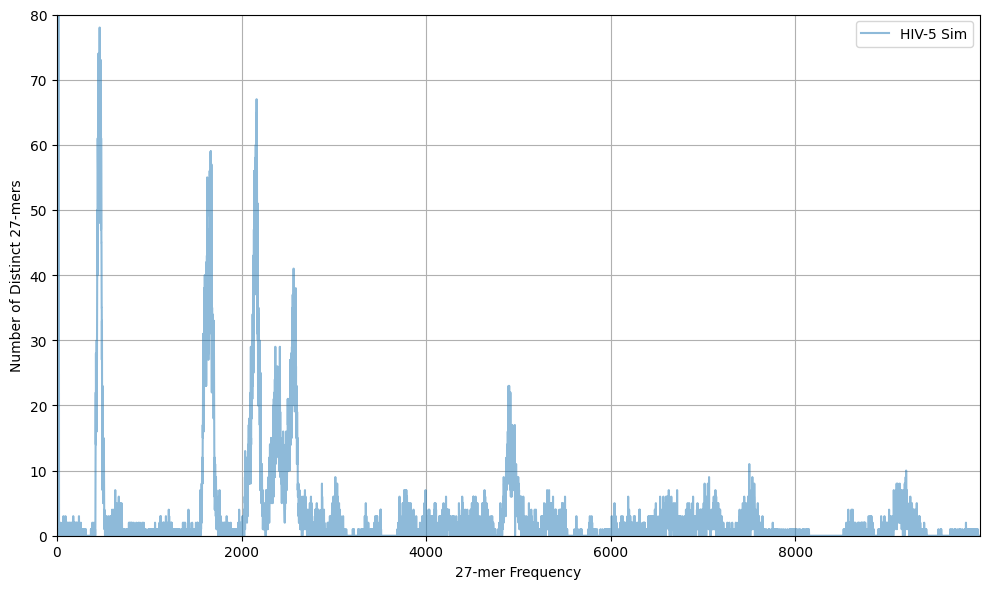

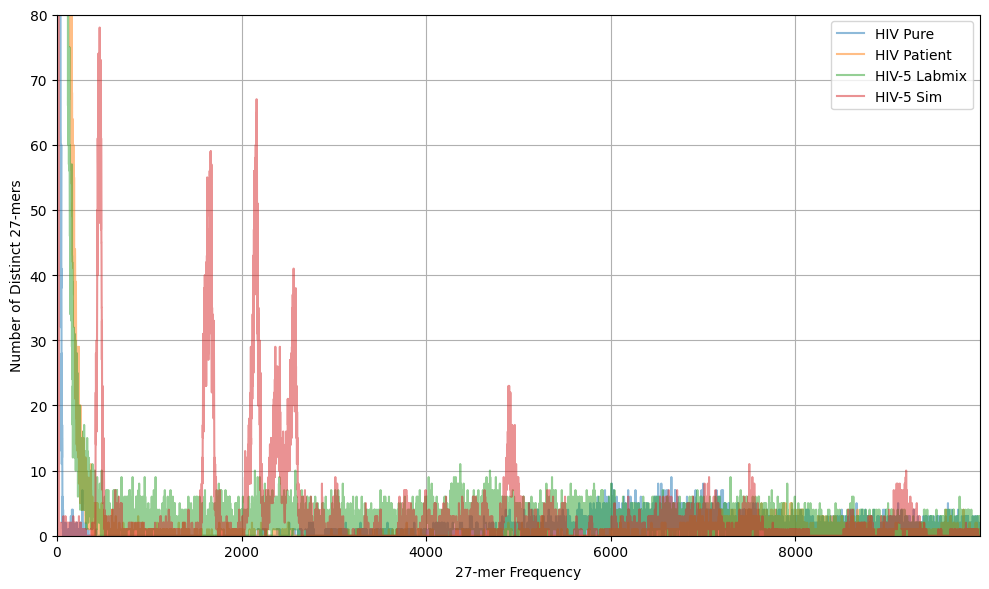

0.0
13.278595888715856
0.0
15.984140511422899
0.0
15.951169967142322
0.0
13.383747161357858


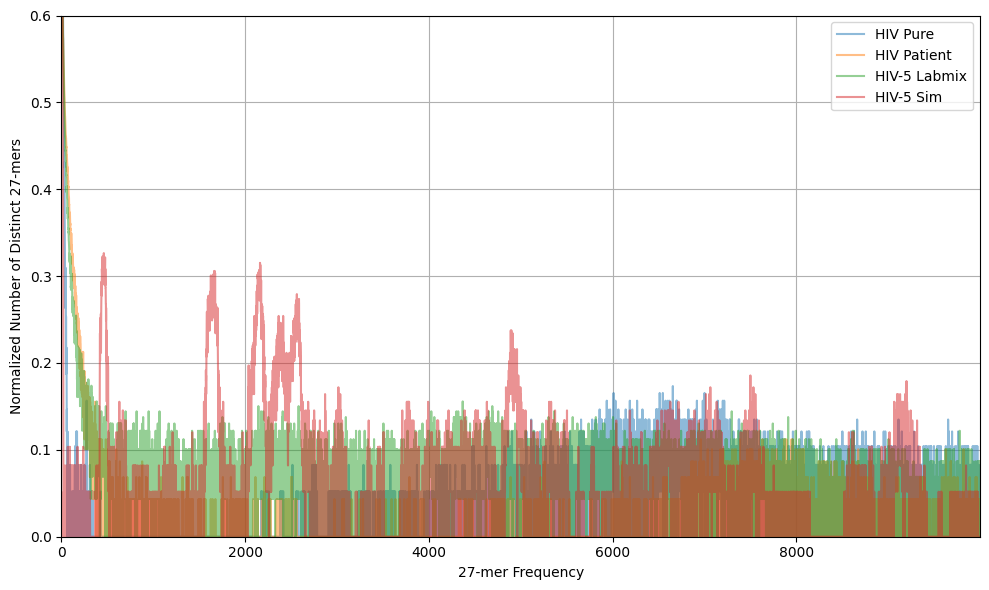

0.0
13.278595888715856
0.0
15.984140511422899
0.0
15.951169967142322
0.0
13.383747161357858


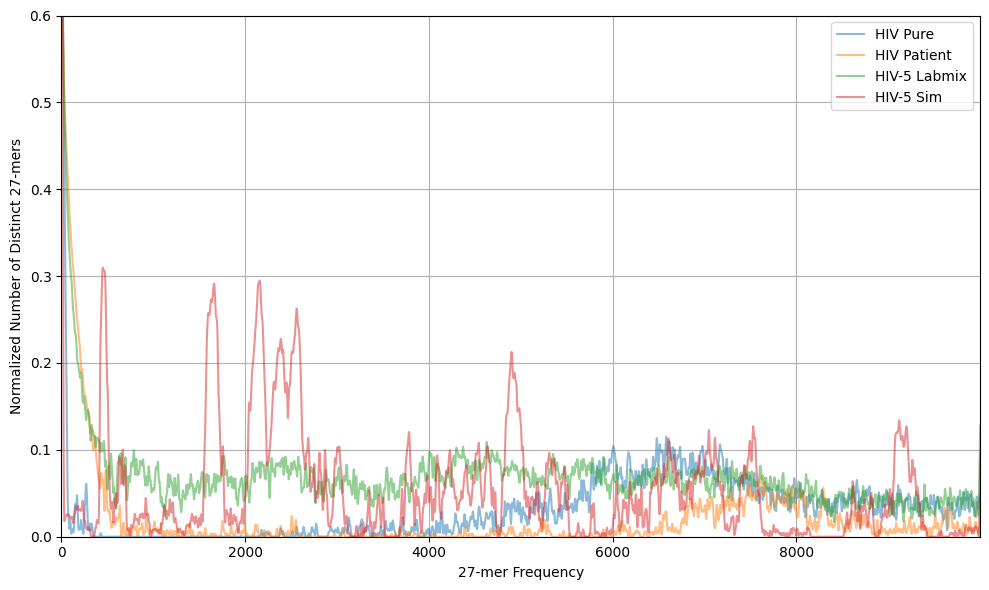

In [230]:
# plot the histograms
#plot hiv-5 labmix
plot_kmer_histograms({
    "HIV-5 Sim": "hiv-5-sim.hist"
}, "graphs", "hiv-5-sim-plot")

# not normalized
plot_kmer_histograms({
    "HIV Pure": "hiv-pure.hist",
    "HIV Patient": "hiv-patient.hist",
    "HIV-5 Labmix": "hiv-5-labmix.hist",
    "HIV-5 Sim": "hiv-5-sim.hist"
}, "graphs", "histograms")

# normalized
plot_kmer_histograms({
    "HIV Pure": "hiv-pure.hist",
    "HIV Patient": "hiv-patient.hist",
    "HIV-5 Labmix": "hiv-5-labmix.hist",
    "HIV-5 Sim": "hiv-5-sim.hist"
}, "graphs", "histograms_normalized", normalize=True)

#smoothed and normalized
plot_kmer_histograms({
    "HIV Pure": "hiv-pure.hist",
    "HIV Patient": "hiv-patient.hist",
    "HIV-5 Labmix": "hiv-5-labmix.hist",
    "HIV-5 Sim": "hiv-5-sim.hist"
}, "graphs", "histograms_smoothed",normalize=True, smoothing=True, sigma=5)
#for zoom default sigma, for whole plot sigma=5



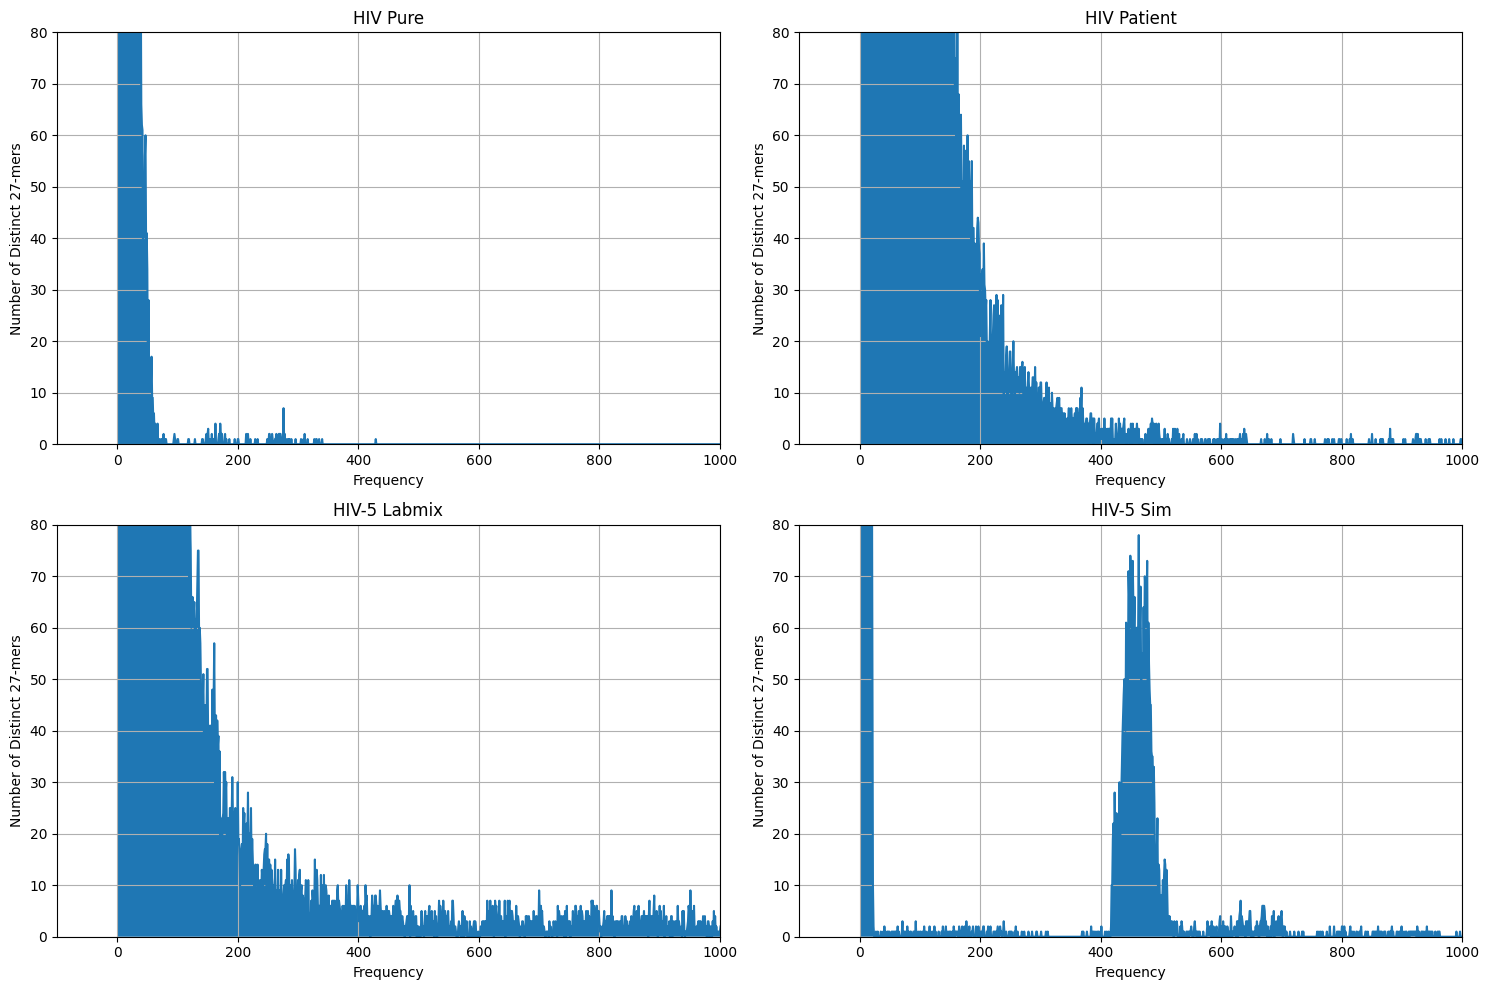

0.0
13.278595888715856
0.0
15.984140511422899
0.0
15.951169967142322
0.0
13.383747161357858


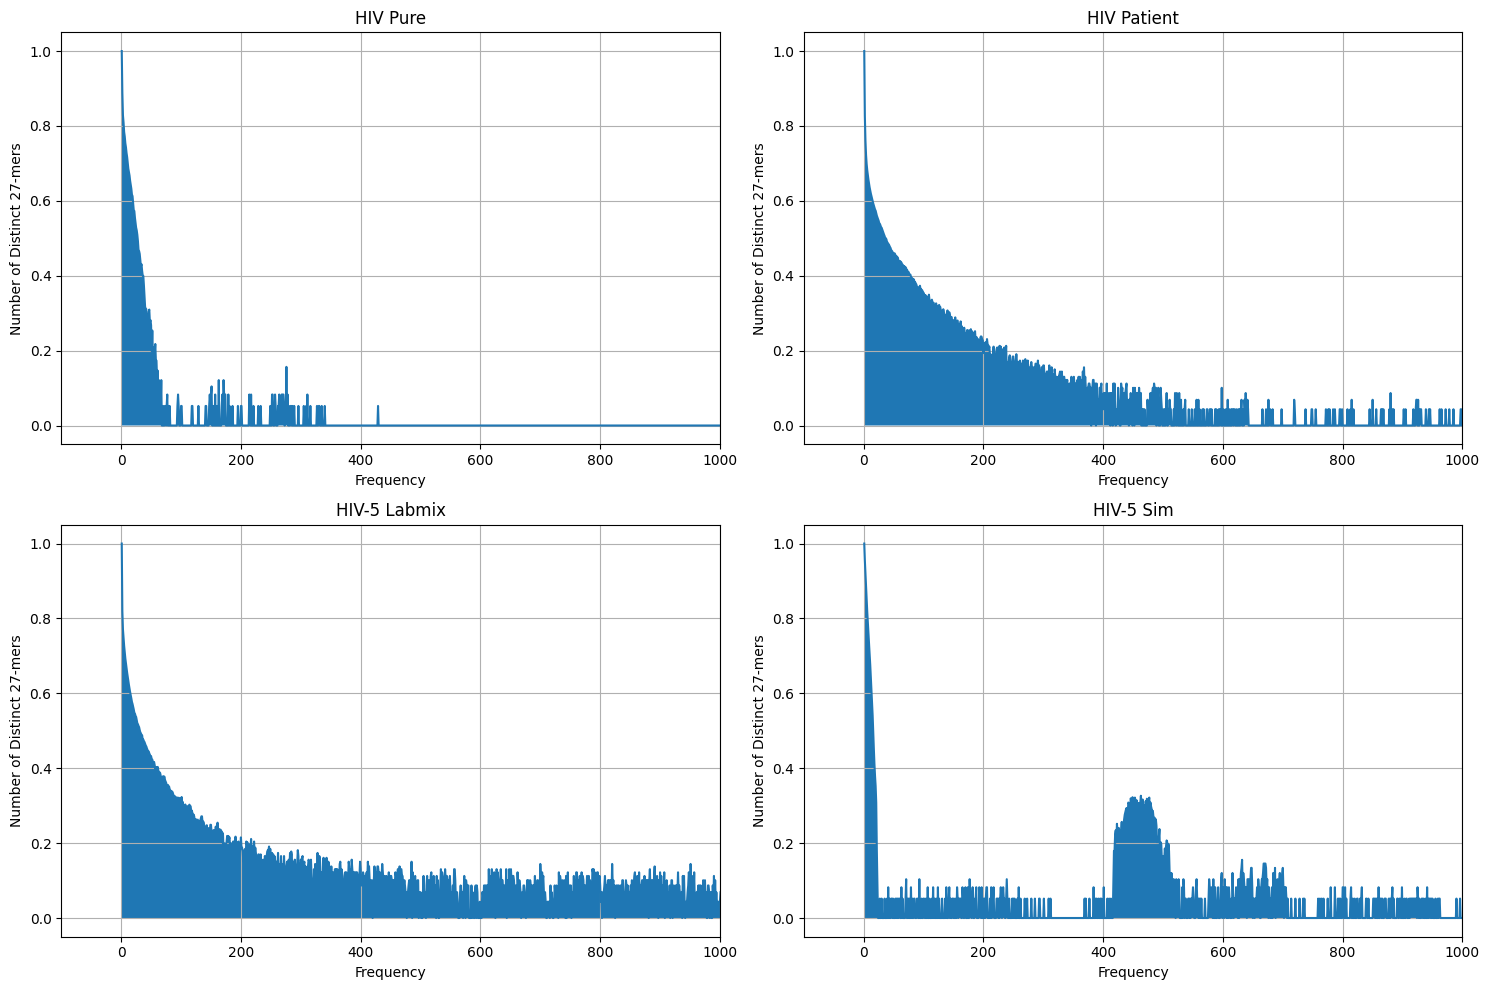

In [216]:
#plot histograms in subplots
plot_k_mer_histograms_subplots({
    "HIV Pure": "hiv-pure.hist",
    "HIV Patient": "hiv-patient.hist",
    "HIV-5 Labmix": "hiv-5-labmix.hist",
    "HIV-5 Sim": "hiv-5-sim.hist"
}, "graphs", "histograms", normalize=False)

plot_k_mer_histograms_subplots({
    "HIV Pure": "hiv-pure.hist",
    "HIV Patient": "hiv-patient.hist",
    "HIV-5 Labmix": "hiv-5-labmix.hist",
    "HIV-5 Sim": "hiv-5-sim.hist"
}, "graphs", "histograms_normalized", normalize=True)

In [202]:
def plot_histograms(input: dict, bins = 200, normalize=False):
    """
    Plots the histograms from multiple .hist files.

    Parameters:
        input (dict): Dictionary where keys are labels for the plot and values are paths to the .hist files.
    """
    plt.figure(figsize=(10, 6))
    
    # Iterate over each label and file path in the dictionary
    for label, file_path in input.items():
        
        data = pd.read_csv(file_path, delim_whitespace=True, comment='#', header=None, names=['kmer_frequency', 'distinct_kmers'])
        
        # Check for and drop any rows with missing values
        data.dropna(inplace=True)
        
        # Select data to plot based on normalization
        if normalize:
            data = normalize_histogram(data)
            y_data = data['distinct_kmers_normalized']
            ylabel = "Normalized Number of Distinct 27-mers"
        else:
            y_data = data['distinct_kmers']
            ylabel = "Number of Distinct 27-mers"
        
        # Plot the histogram with adjusted bins
        plt.hist(y_data, bins=bins, alpha=0.5, label=label, edgecolor='black', log=True, range=(0, 8000))
    
    # Configure the plot
    #plt.title("27-mer Frequency Spectra")
    plt.xlabel("Number of Distinct 27-mers")
    plt.ylabel("Frequency")
    plt.ylim(0, 1000)
    plt.legend()
    plt.grid(True)
    
    # Show the plot
    plt.tight_layout()
    plt.show()

C:\Users\wyjsu\AppData\Local\Temp\ipykernel_68204\1109146463.py:34: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 1000)


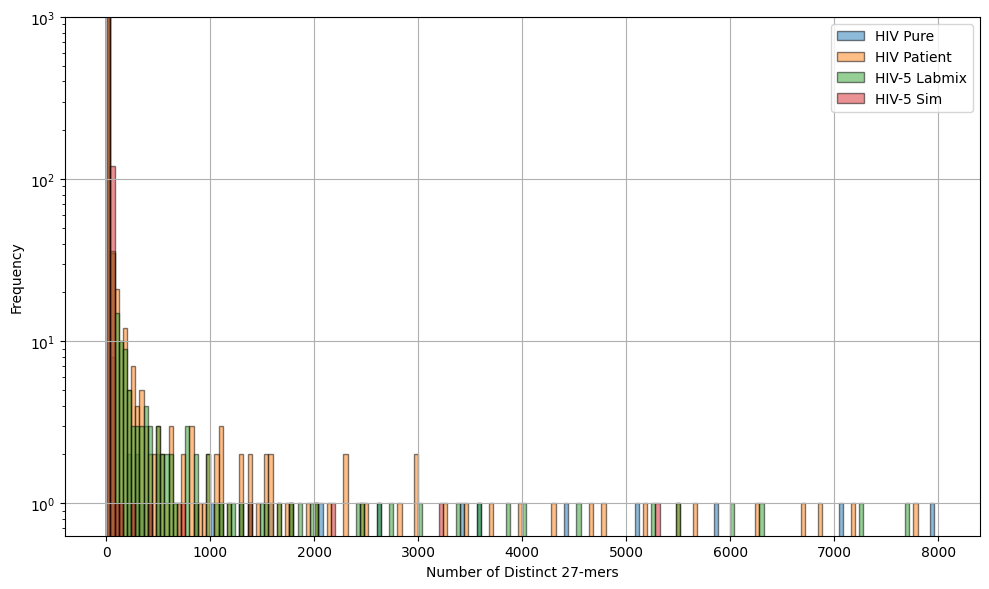

In [87]:
plot_histograms({
    "HIV Pure": "hiv-pure.hist",
    "HIV Patient": "hiv-patient.hist",
    "HIV-5 Labmix": "hiv-5-labmix.hist",
    "HIV-5 Sim": "hiv-5-sim.hist"
}, normalize=False)

In [141]:
def plot_histograms_subplots(input: dict, bins =500, normalize=False):
    #subplots are in 2x2 grid
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))
    for i, (label, file_path) in enumerate(input.items()):
        data = pd.read_csv(file_path, delim_whitespace=True, comment='#', header=None, names=['kmer_frequency', 'distinct_kmers'])
        data.dropna(inplace=True)
        # remove the first two rows
        #data.drop(data.index[0:100], inplace=True)
        if normalize:
            data = zscore_normalize_histogram(data)
            y_data = data['distinct_kmers_normalized']
            ylabel = "Normalized Number of Distinct 27-mers"
        else:
            y_data = data['distinct_kmers']
            ylabel = "Number of Distinct 27-mers"
        #plot histograms
        axs[i//2, i%2].hist(y_data, bins=bins, label=label, range=(100, 9000), histtype='stepfilled')
        axs[i//2, i%2].set_title(label)
        axs[i//2, i%2].set_xlabel("Number of Distinct 27-mers")
        axs[i//2, i%2].set_ylabel("Frequency")
        axs[i//2, i%2].grid(True)
        axs[i//2, i%2].set_ylim(0, 50)

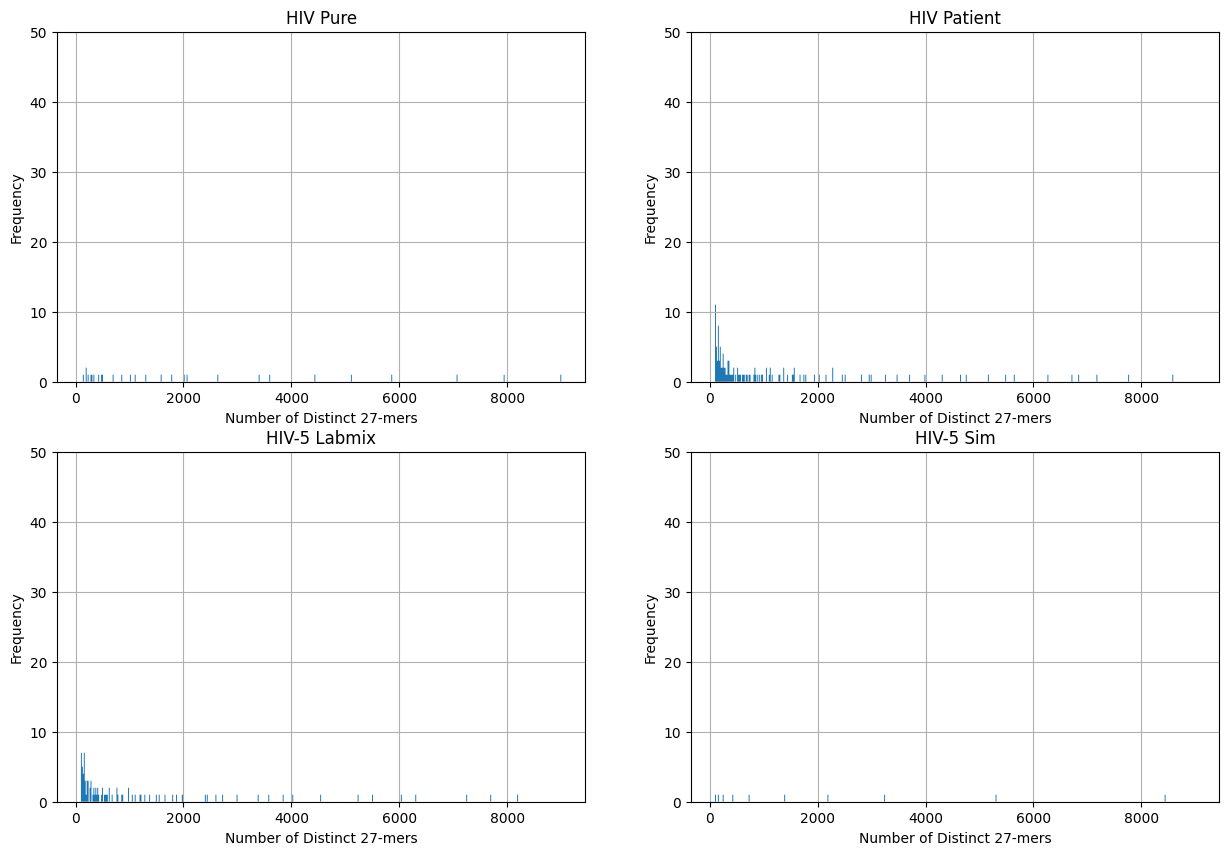

In [142]:
plot_histograms_subplots({
    "HIV Pure": "hiv-pure.hist",
    "HIV Patient": "hiv-patient.hist",
    "HIV-5 Labmix": "hiv-5-labmix.hist",
    "HIV-5 Sim": "hiv-5-sim.hist"
}, normalize=False)

C:\Users\wyjsu\AppData\Local\Temp\ipykernel_68204\1543210925.py:22: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axs[i//2, i%2].set_ylim(0, 1e-5)
C:\Users\wyjsu\AppData\Local\Temp\ipykernel_68204\1543210925.py:22: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axs[i//2, i%2].set_ylim(0, 1e-5)
C:\Users\wyjsu\AppData\Local\Temp\ipykernel_68204\1543210925.py:22: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axs[i//2, i%2].set_ylim(0, 1e-5)
C:\Users\wyjsu\AppData\Local\Temp\ipykernel_68204\1543210925.py:22: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  axs[i//2, i%2].set_ylim(0, 1e-5)


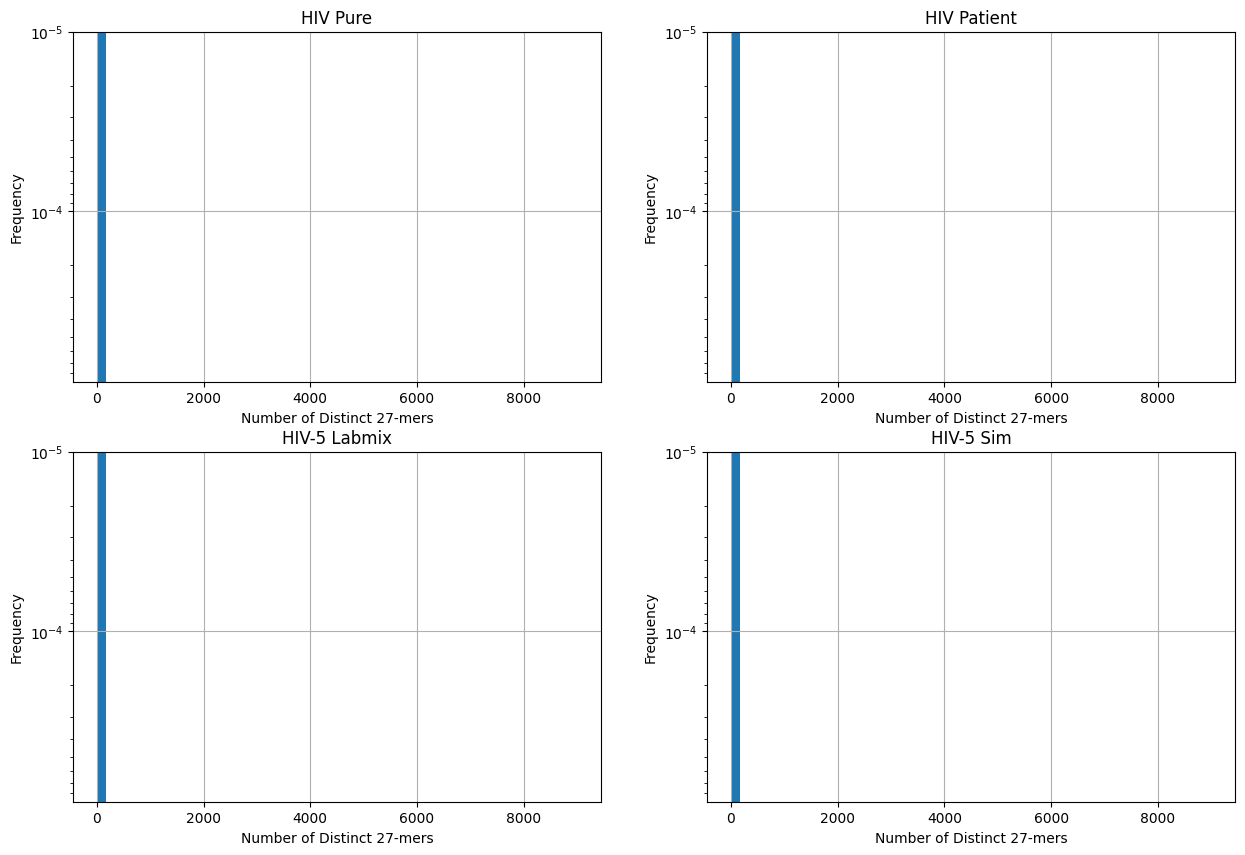

In [124]:
plot_histograms_subplots({
    "HIV Pure": "hiv-pure.hist",
    "HIV Patient": "hiv-patient.hist",
    "HIV-5 Labmix": "hiv-5-labmix.hist",
    "HIV-5 Sim": "hiv-5-sim.hist"
}, normalize=True)